# Árboles de decisión

### Docente: M.Sc. Richard Fernández 

In [ ]:
#https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html

In [25]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import scipy.stats as ss
from scipy.stats import chi2_contingency
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import roc_curve, auc, roc_auc_score
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

In [2]:
data = pd.read_csv('C:/Users/Juan/Desktop/UPC/Septimo Ciclo/MachineLearning/Social_Network_Ads.csv')

In [3]:
data.head(5)

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [4]:
data.dtypes

User ID             int64
Gender             object
Age                 int64
EstimatedSalary     int64
Purchased           int64
dtype: object

In [5]:
#data['V'] = data.V.astype(object)

In [6]:
data.dtypes

User ID             int64
Gender             object
Age                 int64
EstimatedSalary     int64
Purchased           int64
dtype: object

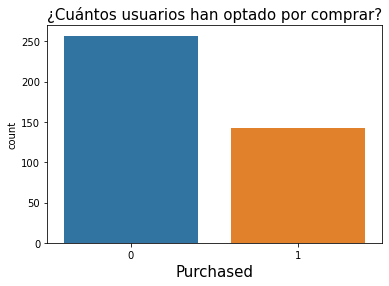

In [7]:
sns.countplot(data = data, x = 'Purchased')
plt.xlabel('Purchased', fontsize = 15)
plt.title('¿Cuántos usuarios han optado por comprar?', fontsize = 15)
plt.show()

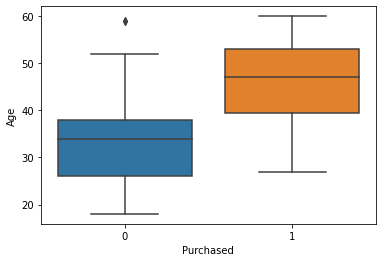

In [8]:
sns.boxplot(x='Purchased',y='Age',data=data)
plt.show()

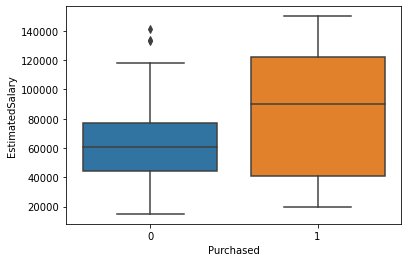

In [9]:
sns.boxplot(x='Purchased',y='EstimatedSalary',data=data)
plt.show()

Gender     Female  Male
Purchased              
0             127   130
1              77    66


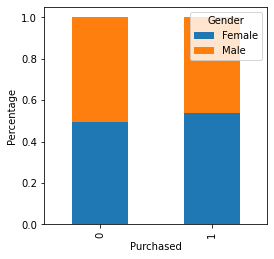

In [10]:
print(pd.crosstab(data["Purchased"],data["Gender"]))
Gender = pd.crosstab(data["Purchased"],data["Gender"])
Gender.div(Gender.sum(1).astype(float),axis=0).plot(kind="bar",stacked=True,figsize=(4,4))
plt.xlabel("Purchased")
plt.ylabel("Percentage")
plt.show()

In [11]:
#Prueba Chi-Cuadrado
#Ho: no existe dependencia entre las variables
#Ha: existe dependencia entre las variables

In [13]:
contigencia = pd.crosstab(data['Purchased'], data['Gender']) 
c, p, dof, expected = chi2_contingency(contigencia) 
print(p)

0.45624659183130645


In [14]:
#Como el pvalue > 5%, no se rechaza la Ho.
#Con un nivel de confianza del 95%, no existe dependencia entre las variables Purchased y Gender

In [15]:
X = data.iloc[:,[2, 3]].values
y = data.iloc[:,-1].values

In [16]:
X[0:5]

array([[   19, 19000],
       [   35, 20000],
       [   26, 43000],
       [   27, 57000],
       [   19, 76000]], dtype=int64)

In [17]:
y[0:5]

array([0, 0, 0, 0, 0], dtype=int64)

In [18]:
#le = LabelEncoder()
#X[:,0] = le.fit_transform(X[:,0])

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 0)

In [20]:
X_train[0:5]

array([[    58, 144000],
       [    59,  83000],
       [    24,  55000],
       [    26,  35000],
       [    58,  38000]], dtype=int64)

In [21]:
X_test[0:5]

array([[   30, 87000],
       [   38, 50000],
       [   35, 75000],
       [   30, 79000],
       [   35, 50000]], dtype=int64)

In [18]:
#X_train = StandardScaler().fit_transform(X_train)
#X_test = StandardScaler().fit_transform(X_test)

In [19]:
#X_train[0:5]

In [20]:
#X_test[0:5]

In [22]:
#Tuning
#max_depth: La profundidad máxima del árbol
#min_samples_leaf: El número mínimo de muestras necesarias para estar en un nodo hoja
#criterion: La función para medir la calidad de una división
param_grid = {
    'max_depth': [2, 3, 5, 10, 20],
    'min_samples_leaf': [5, 10, 20, 50, 100],
    'criterion': ["gini", "entropy"]
}

In [26]:
grid = GridSearchCV(tree.DecisionTreeClassifier(),param_grid,refit=True,verbose=2,cv=5)
grid.fit(X_train,y_train)

Fitting 5 folds for each of 50 candidates, totalling 250 fits
[CV] END ....criterion=gini, max_depth=2, min_samples_leaf=5; total time=   0.0s
[CV] END ....criterion=gini, max_depth=2, min_samples_leaf=5; total time=   0.0s
[CV] END ....criterion=gini, max_depth=2, min_samples_leaf=5; total time=   0.0s
[CV] END ....criterion=gini, max_depth=2, min_samples_leaf=5; total time=   0.0s
[CV] END ....criterion=gini, max_depth=2, min_samples_leaf=5; total time=   0.0s
[CV] END ...criterion=gini, max_depth=2, min_samples_leaf=10; total time=   0.0s
[CV] END ...criterion=gini, max_depth=2, min_samples_leaf=10; total time=   0.0s
[CV] END ...criterion=gini, max_depth=2, min_samples_leaf=10; total time=   0.0s
[CV] END ...criterion=gini, max_depth=2, min_samples_leaf=10; total time=   0.0s
[CV] END ...criterion=gini, max_depth=2, min_samples_leaf=10; total time=   0.0s
[CV] END ...criterion=gini, max_depth=2, min_samples_leaf=20; total time=   0.0s
[CV] END ...criterion=gini, max_depth=2, min_sa

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 3, 5, 10, 20],
                         'min_samples_leaf': [5, 10, 20, 50, 100]},
             verbose=2)

In [27]:
print(grid.best_estimator_)

DecisionTreeClassifier(max_depth=2, min_samples_leaf=5)


In [28]:
#Árbol de decisión CART
classifier = tree.DecisionTreeClassifier(max_depth=2, min_samples_leaf=5).fit(X_train, y_train)

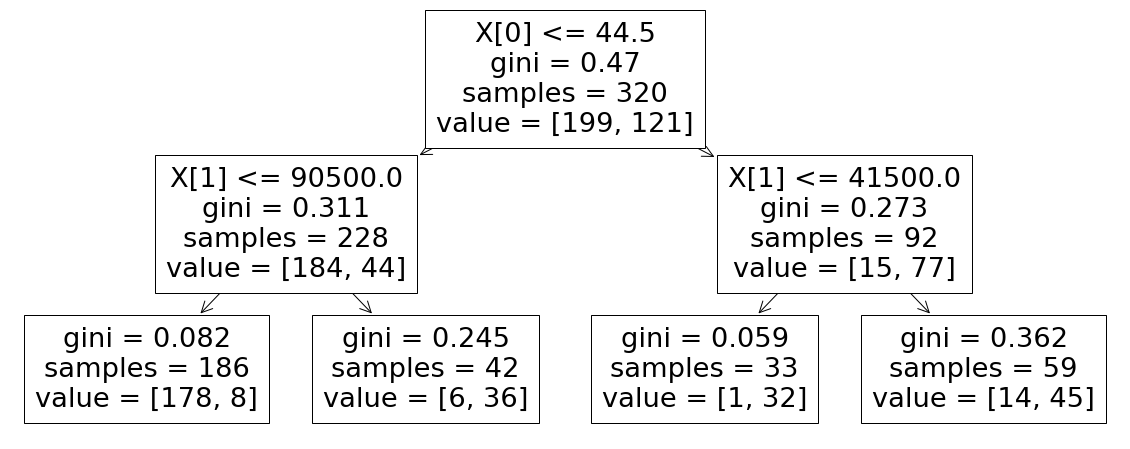

In [29]:
plt.figure(figsize = (20,8))
tree.plot_tree(classifier)
plt.show()

In [46]:
get_dt_graph(classifier)

NameError: name 'get_dt_graph' is not defined

In [30]:
y_pred = classifier.predict(X_test)

In [31]:
y_pred[0:5]

array([0, 0, 0, 0, 0], dtype=int64)

In [32]:
y_test[0:5]

array([0, 0, 0, 0, 0], dtype=int64)

In [33]:
confusion_matrix(y_test, y_pred)

array([[55,  3],
       [ 1, 21]], dtype=int64)

Confusion matrix, without normalization
[[55  3]
 [ 1 21]]
Normalized confusion matrix
[[0.94827586 0.05172414]
 [0.04545455 0.95454545]]


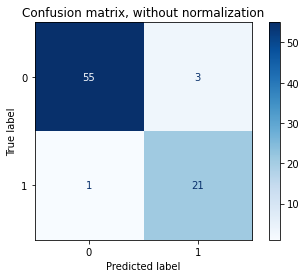

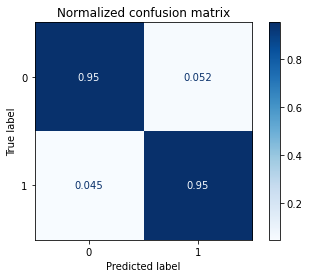

In [34]:
# Plot non-normalized confusion matrix
titles_options = [("Confusion matrix, without normalization", None),
                  ("Normalized confusion matrix", 'true')]
for title, normalize in titles_options:
    disp = plot_confusion_matrix(classifier, X_test, y_test,
                                 #display_labels=y_test,
                                 cmap=plt.cm.Blues,
                                 normalize=normalize)
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)

plt.show()

In [35]:
y_pred_prob = classifier.predict_proba(X_test)

In [36]:
y_pred_prob[0:5]

array([[0.95698925, 0.04301075],
       [0.95698925, 0.04301075],
       [0.95698925, 0.04301075],
       [0.95698925, 0.04301075],
       [0.95698925, 0.04301075]])

In [37]:
y_pred_prob[0:5,1]

array([0.04301075, 0.04301075, 0.04301075, 0.04301075, 0.04301075])

In [38]:
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred_prob[:,1])

In [39]:
roc_auc = auc(false_positive_rate, true_positive_rate)
roc_auc

0.9494514106583072

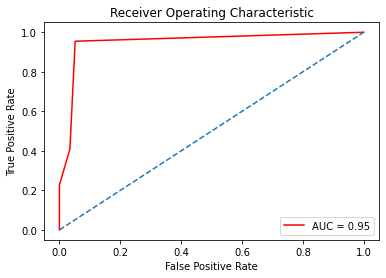

In [40]:
plt.title('Receiver Operating Characteristic')
plt.plot(false_positive_rate,true_positive_rate, color='red',label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],linestyle='--')
plt.axis('tight')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [41]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.98      0.95      0.96        58
           1       0.88      0.95      0.91        22

    accuracy                           0.95        80
   macro avg       0.93      0.95      0.94        80
weighted avg       0.95      0.95      0.95        80



In [42]:
dataf = pd.concat([pd.DataFrame(X_test),pd.DataFrame(y_test),pd.DataFrame(y_pred),pd.DataFrame(y_pred_prob)],axis=1)

In [43]:
dataf.head(5)

,0,1,0,0,0,1
0,30,87000,0,0,0.956989,0.043011
1,38,50000,0,0,0.956989,0.043011
2,35,75000,0,0,0.956989,0.043011
3,30,79000,0,0,0.956989,0.043011
4,35,50000,0,0,0.956989,0.043011


In [44]:
dataf.columns = ['Age', 'EstimatedSalary', 'Purchased', 'Purchased_Pred', 'Purchased_Pred_Prob_0', 'Purchased_Pred_Prob_1']

In [45]:
dataf.head(10)

,Age,EstimatedSalary,Purchased,Purchased_Pred,Purchased_Pred_Prob_0,Purchased_Pred_Prob_1
0,30,87000,0,0,0.956989,0.043011
1,38,50000,0,0,0.956989,0.043011
2,35,75000,0,0,0.956989,0.043011
3,30,79000,0,0,0.956989,0.043011
4,35,50000,0,0,0.956989,0.043011
5,27,20000,0,0,0.956989,0.043011
6,31,15000,0,0,0.956989,0.043011
7,36,144000,1,1,0.142857,0.857143
8,18,68000,0,0,0.956989,0.043011
9,47,43000,0,1,0.237288,0.762712


In [104]:
dataf.to_csv('D/dataf.csv', index = False)